# ML_CA2: Income Prediction and Sentiment Analysis


In [1]:
# Import libraries
import pandas as pd

# Load dataset
file_path = r"C:\Users\Administrator\Desktop\ML-CA2\BankRecords.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

To understand the structure and contents of the dataset, I display the first five rows using `head()` and summarize the data types and non-null counts using `info()`. This provides a quick overview of overall shape.


In [3]:
# Check basic statistics of numeric features
print("\n🔹 Statistical Summary of Numeric Columns")
display(df.describe())


🔹 Statistical Summary of Numeric Columns


,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


####  Checking Missing Values

In [4]:
# Check for missing values in each column
missing_summary = df.isnull().sum()
# Only display columns that actually have missing values (i.e., > 0)
print("Missing Values per Column:\n", missing_summary[missing_summary > 0])


Missing Values per Column:
 Series([], dtype: int64)


I used `isnull().sum()` to count missing values in each column. This ensures the dataset is complete before further processing.


#### Checking Duplicates Rows

In [5]:
# Detect duplicate rows
duplicates = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicates}")



Total Duplicate Rows: 0


I checked for duplicate records to avoid redundancy.

#### Exploring Categorical Features


In [6]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Display unique value counts for each categorical feature
for col in categorical_cols:
    print(f"\n🔹 Unique values in '{col}':")
    print(df[col].value_counts())



🔹 Unique values in 'Education':
Education
Diploma    2096
Masters    1501
Degree     1403
Name: count, dtype: int64

🔹 Unique values in 'Personal Loan':
Personal Loan
No     4520
Yes     480
Name: count, dtype: int64

🔹 Unique values in 'Securities Account':
Securities Account
No     4478
Yes     522
Name: count, dtype: int64

🔹 Unique values in 'CD Account':
CD Account
No     4698
Yes     302
Name: count, dtype: int64

🔹 Unique values in 'Online Banking':
Online Banking
Yes    2984
No     2016
Name: count, dtype: int64

🔹 Unique values in 'CreditCard':
CreditCard
No     3530
Yes    1470
Name: count, dtype: int64


I explore the unique values in all categorical columns to understand possible categories and detect any data inconsistencies or imbalances.
Most categorical features are binary (Yes/No), such as 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', and 'CreditCard'.  
The 'Education' column contains three levels — Diploma, Masters, and Degree — and may be encoded.
This step ensures that the data is clean, consistent, and ready for appropriate encoding strategies.


## Part 1- Neural Networks

#### Distribution of Customer Income

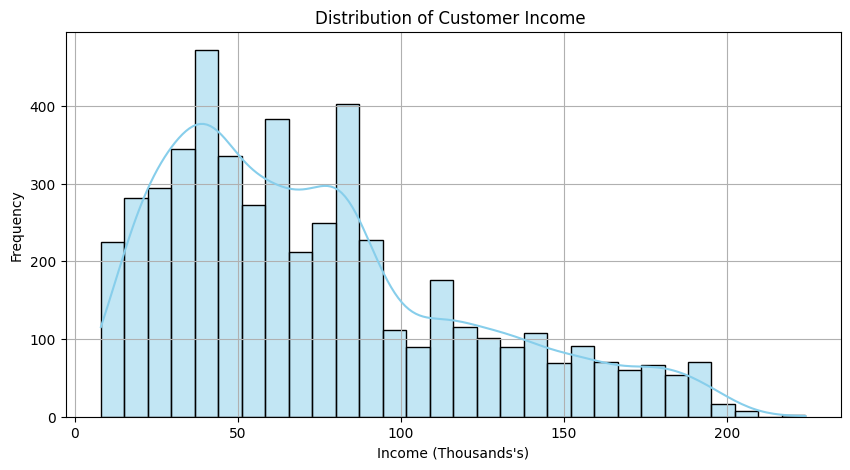

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the income column
plt.figure(figsize=(10, 5))

# Histogram with KDE (smoothed curve)
sns.histplot(df["Income(Thousands's)"], kde=True, bins=30, color="skyblue")

# Add plot titles and labels
plt.title("Distribution of Customer Income ")
plt.xlabel("Income (Thousands's)")
plt.ylabel("Frequency")

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


I visualize the distribution of the target variable `Income(Thousands's)` using a histogram with a KDE (Kernel Density Estimate) curve. This helps to understand the spread, skewness, and possible outliers in the income data.
The distribution appears to be right-skewed, with a high concentration of customers earning between $20k and $80k, and fewer customers in the higher income ranges.


#### Income Distribution by Experience


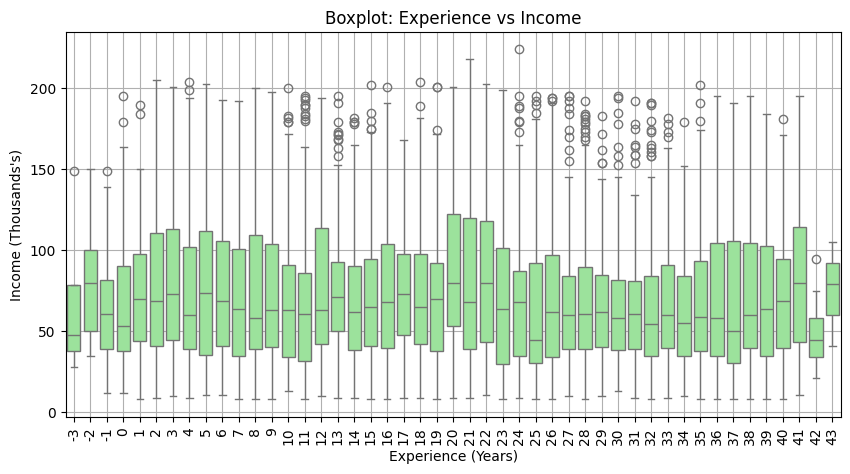

In [8]:
# Boxplot: Income distribution by Experience (Years)
plt.figure(figsize=(10, 5))

# Show boxplot
sns.boxplot(x=df["Experience(Years)"], y=df["Income(Thousands's)"], color='lightgreen')

# Title and labels
plt.title("Boxplot: Experience vs Income")
plt.xlabel("Experience (Years)")
plt.ylabel("Income (Thousands's)")

# Fix overlapping x-axis labels
plt.xticks(rotation=90)

# Add grid for readability
plt.grid(True)

# Show plot
plt.show()


This boxplot visualizes the distribution of customer income across different experience levels. It helps identify how income varies with experience and highlights outliers or irregularities.
From the plot, we can observe that income distribution varies widely within experience groups, and some low or negative experience values may indicate data entry issues.


In [9]:
# Fix negative experience values by converting them to absolute values
# This corrects invalid data entries like -2 or -3 years of experience
df['Experience(Years)'] = df['Experience(Years)'].apply(lambda x: abs(x))


The boxplot visualization of Experience vs Income, we observed invalid negative values in the 'Experience(Years)' column.  
Since experience cannot be negative, I corrected this by converting all values to their absolute equivalents.


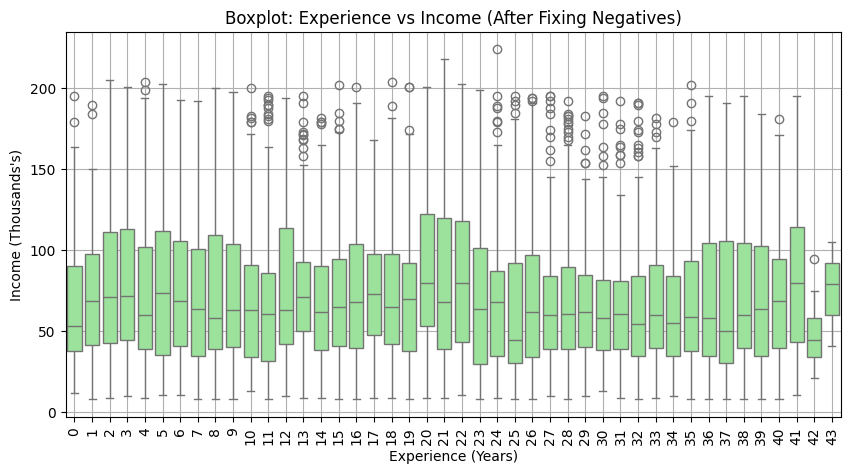

In [10]:
# Replot the boxplot after fixing negative experience values
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Experience(Years)"], y=df["Income(Thousands's)"], color='lightgreen')
plt.title("Boxplot: Experience vs Income (After Fixing Negatives)")
plt.xlabel("Experience (Years)")
plt.ylabel("Income (Thousands's)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


After converting negative experience values to positive, I replot the boxplot to confirm that the data correction has taken effect.  
The updated plot now reflects only valid (positive) experience values and gives a clearer view of income distribution across experience levels.


##### Visualizing the Relationship Between Credit Score and Income


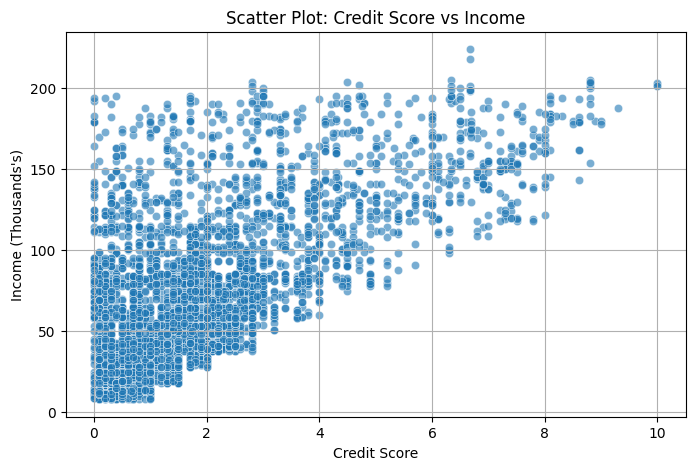

In [11]:
# Scatter plot: Credit Score vs Income
plt.figure(figsize=(8, 5))

# Plot each data point as a semi-transparent dot
sns.scatterplot(x=df["Credit Score"], y=df["Income(Thousands's)"], alpha=0.6)

# Add plot title and axis labels
plt.title("Scatter Plot: Credit Score vs Income")
plt.xlabel("Credit Score")
plt.ylabel("Income (Thousands's)")

# Show gridlines for better readability
plt.grid(True)

# Display the plot
plt.show()


#### Compare income distribution across education levels

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9980\1489061803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y="Income(Thousands's)", data=df, palette='pastel')


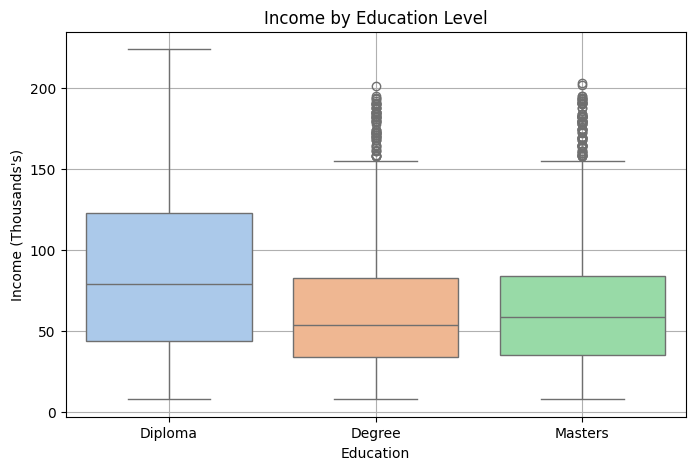

In [12]:
# Boxplot to compare income distribution across education levels
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y="Income(Thousands's)", data=df, palette='pastel')
plt.title("Income by Education Level")
plt.xlabel("Education")
plt.ylabel("Income (Thousands's)")
plt.grid(True)
plt.show()


This boxplot compares the distribution of income across different education levels: Diploma, Degree, and Masters.  
Interestingly, customers with a Diploma appear to have a wider income range and higher median income compared to those with a Degree or Masters. This may indicate that formal education level is not strongly correlated with income in this dataset.


#### Income Distribution Based on Personal Loan Status


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9980\1278953504.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Personal Loan', y="Income(Thousands's)", data=df, jitter=True, palette='coolwarm')


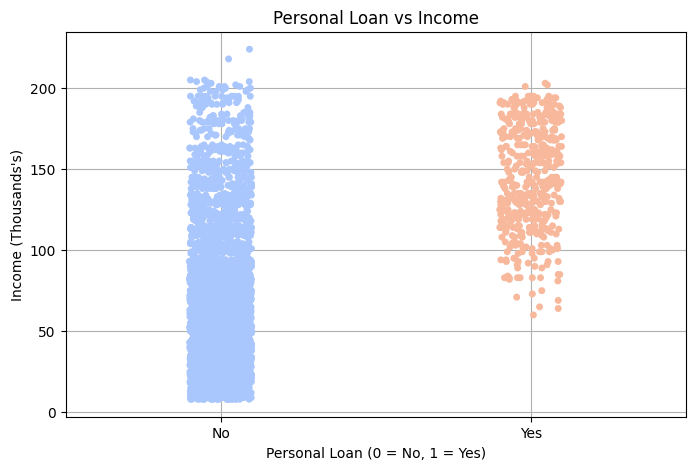

In [13]:
# Income distribution by Personal Loan status
plt.figure(figsize=(8, 5))

# Plot income values for 'Yes' and 'No' loan categories with jitter to spread points
sns.stripplot(x='Personal Loan', y="Income(Thousands's)", data=df, jitter=True, palette='coolwarm')

# Set plot title and labels
plt.title("Personal Loan vs Income")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Income (Thousands's)")

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()


This strip plot compares customer income based on whether they have a personal loan. It can be seen that customers who have taken a personal loan generally belong to higher income brackets, while those without a loan are spread across a wider income range.


#### Correlation Heatmap

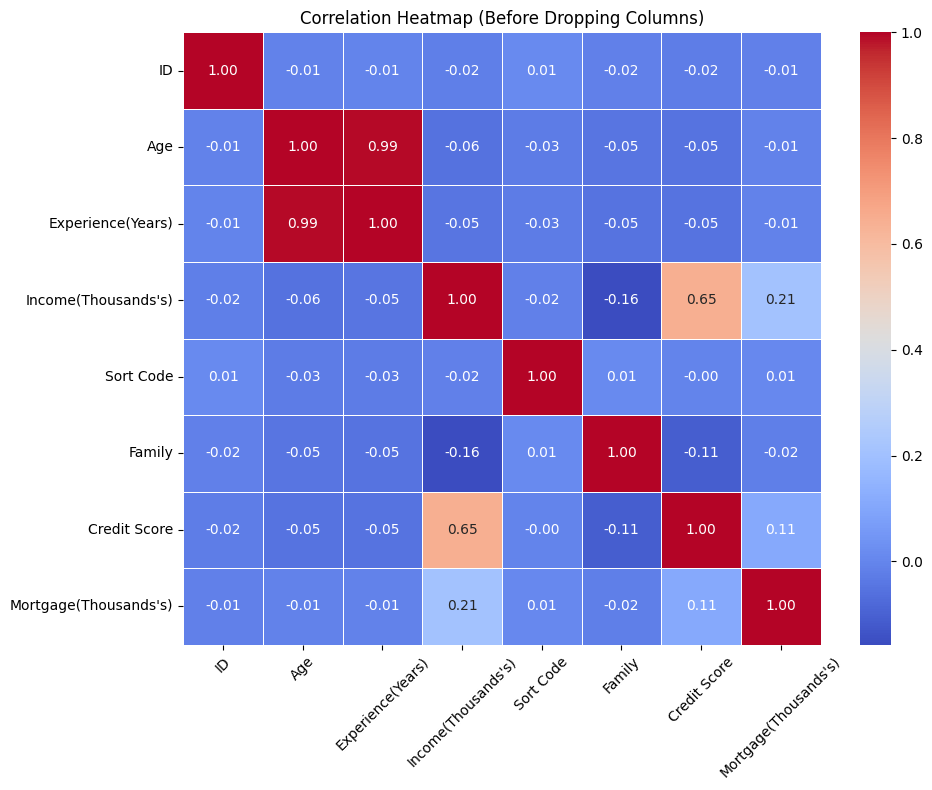

In [14]:
# Compute the correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Before Dropping Columns)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The heatmap shows that `Credit Score` has a strong positive correlation (0.65) with income, while `ID` and `Sort Code` have no meaningful correlation. 

In [15]:
# Drop columns that are not useful for prediction
# 'ID' is just a unique identifier, and 'Sort Code' is unrelated to income behavior
df.drop(['ID', 'Sort Code'], axis=1, inplace=True)


I dropped the `ID` and `Sort Code` columns because they do not contribute to income prediction. `ID` is a unique identifier, and `Sort Code` is a banking detail with no predictive value in the context of customer behavior or financial attributes.


In [16]:
df.head()

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,1,49,4,1.6,Diploma,0,No,Yes,No,No,No
1,45,19,34,3,1.5,Diploma,0,No,Yes,No,No,No
2,39,15,11,1,1.0,Diploma,0,No,No,No,No,No
3,35,9,100,1,2.7,Degree,0,No,No,No,No,No
4,35,8,45,4,1.0,Degree,0,No,No,No,No,Yes


#### Encode Binary Categorical Variables


In [17]:
# Define binary columns to encode
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

# Replace 'Yes' with 1 and 'No' with 0
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9980\1601126403.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})


Machine learning models require all input features to be numerical. Binary categorical variables such as `"Yes"` and `"No"` cannot be directly processed by algorithms like Linear Regression or Random Forest. Therefore, these values were encoded as `1` (Yes) and `0` (No) to ensure compatibility with modeling processes and enable the algorithms to learn from these features effectively.

#### One-Hot Encoding for Multiclass Categorical Variable ('Education')

In [18]:
# One-hot encoding for 'Education'
df = pd.get_dummies(df, columns=['Education'], drop_first=True)  # drops 'Diploma'


The `Education` column contained three categories: Degree, Diploma, and Masters. One-hot encoding was applied to convert these categorical values into numeric format, and `drop_first=True` was used to avoid multicollinearity.

As a result, two dummy variables were created: `Education_Diploma` and `Education_Masters`. The **Degree** category was dropped and now serves as the baseline. This ensures that the model can interpret education levels correctly while avoiding redundant information.


In [19]:
df.head()

,Age,Experience(Years),Income(Thousands's),Family,Credit Score,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Education_Diploma,Education_Masters
0,25,1,49,4,1.6,0,0,1,0,0,0,True,False
1,45,19,34,3,1.5,0,0,1,0,0,0,True,False
2,39,15,11,1,1.0,0,0,0,0,0,0,True,False
3,35,9,100,1,2.7,0,0,0,0,0,0,False,False
4,35,8,45,4,1.0,0,0,0,0,0,1,False,False


#### Feature-Target Split


In [20]:
# Define the target column
target = "Income(Thousands's)"

# Split the dataset into input features (X) and target variable (y)
X = df.drop(target, axis=1)
y = df[target]

# Display the dimensions of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (5000, 12)
y shape: (5000,)


The target variable for this regression task is Income(Thousands'), which represents the income of each customer in thousands. I separated this column from the input features to prepare the data for modeling.
This allows the regression and neural network models to learn patterns in the input features that best predict the income value.

#### Outlier Detection Using IQR Method


In [21]:
# List of numerical columns to check for outliers (excluding target)
num_cols = ['Age', 'Experience(Years)', 'Credit Score', "Mortgage(Thousands's)"]

# Function to detect outliers using IQR method
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                # Interquartile range
    lower = Q1 - 1.5 * IQR       # Lower bound
    upper = Q3 + 1.5 * IQR       # Upper bound
    outliers = df[(df[col] < lower) | (df[col] > upper)]  # Detect outliers
    return len(outliers), round(100 * len(outliers) / len(df), 2)

# Apply the function to each column and print results
print("🔍 Outlier Detection (IQR Method):")
for col in num_cols:
    count, percent = detect_outliers_iqr(col)
    print(f"{col}: {count} outliers ({percent}%)")


🔍 Outlier Detection (IQR Method):
Age: 0 outliers (0.0%)
Experience(Years): 0 outliers (0.0%)
Credit Score: 324 outliers (6.48%)
Mortgage(Thousands's): 291 outliers (5.82%)


I applied the Interquartile Range (IQR) method to detect outliers in the numerical features. This technique identifies values that lie significantly below the first quartile (Q1) or above the third quartile (Q3), flagging them as potential outliers.
However, instead of removing these values, I opted to retain them and apply a RobustScaler during normalization. The reason for this approach is that RobustScaler is specifically designed to be resilient to outliers. It scales the features using the median and the IQR, which prevents extreme values from disproportionately affecting the model.
This ensures the model benefits from the complete data distribution without being heavily skewed by outlier

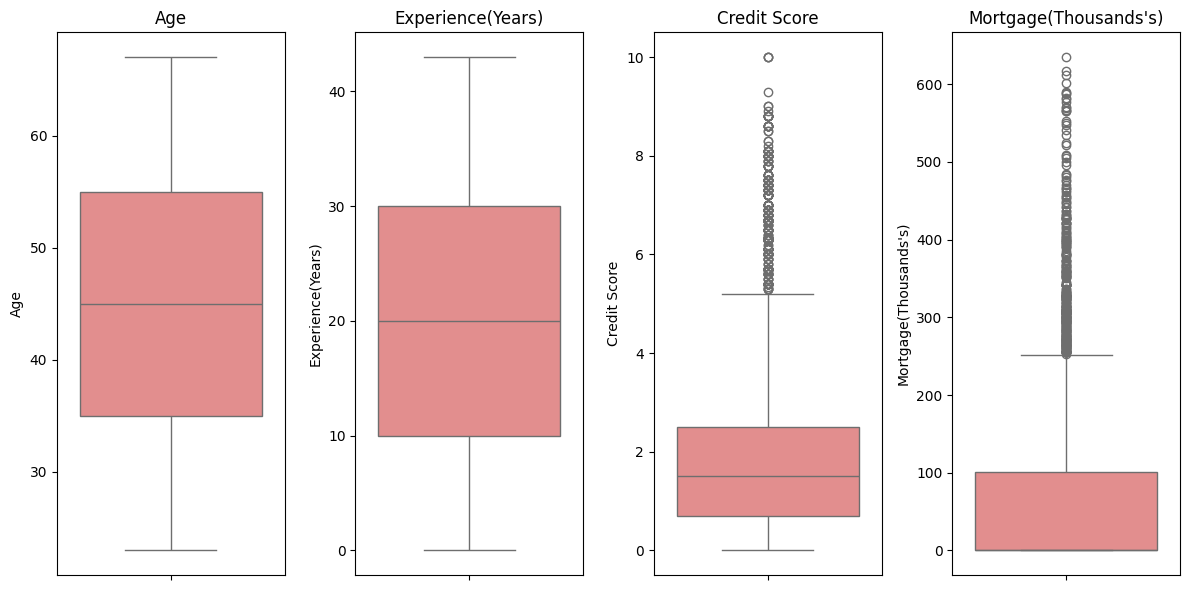

In [22]:
# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(col)
plt.tight_layout()
plt.show()


#### Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

# Redefine target column (if not already done after outlier removal)
target = "Income(Thousands's)"
X = df.drop(target, axis=1)
y = df[target]

# Perform 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 12)
X_test shape: (1000, 12)
y_train shape: (4000,)
y_test shape: (1000,)


The dataset was split into training and testing sets:
- `X_train` and `y_train` contain 80% of the data used to train the model.
- `X_test` and `y_test` contain the remaining 20% used for evaluating the model's performance on unseen data.


#### Feature Scaling with RobustScaler


In [24]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (4000, 12)
X_test_scaled shape: (1000, 12)


I applied RobustScaler to scale the input features prior to model training. Unlike StandardScaler, which relies on the mean and standard deviation, RobustScaler uses the median and interquartile range (IQR). This approach makes it more robust to the influence of outliers.
This choice was particularly appropriate for this dataset because some mild outliers were retained during preprocessing. By using the median and IQR, RobustScaler ensures that the scaling process is not heavily influenced by these extreme values.
Applying this scaler helps improve the stability of the Linear Regression model by reducing the impact of outliers on coefficient estimation. It also supports the convergence of the Neural Network model by maintaining numerical consistency during training.

### Modeling

###  Neural Network

In [25]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network architecture
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model with Adam optimizer and MSE loss
nn_model.compile(optimizer='adam', loss='mse')

# Train the model using scaled features
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=0  # Change to 1 if you want to see training progress
)


To predict customer income, I built a neural network . I implemented a two-layer feedforward network, which is a standard starting point for moderately sized datasets. The first hidden layer contains 64 neurons and the second has 32 neurons, both using the ReLU activation function. This configuration allows the model to capture non-linear patterns in the data while progressively reducing complexity through the smaller second layer.

The decision to use 64 and 32 neurons was guided by the principle of starting with a reasonably expressive model and reducing dimensionality deeper into the network. The use of ReLU activation helps avoid vanishing gradients and supports faster convergence during training. A single neuron with a linear activation function was used in the output layer, which is suitable for predicting continuous values such as income.

This architecture offers a balance between model complexity and computational efficiency, making it well-suited for the dataset. While alternative configurations were considered, this structure was found to perform effectively without overfitting  (Brownlee, 2018).




In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on train and test sets
y_train_pred = nn_model.predict(X_train_scaled).flatten()
y_test_pred = nn_model.predict(X_test_scaled).flatten()

# Training metrics
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Testing metrics
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Display results
print(" Neural Network Performance")
print(f"Train R²: {r2_train:.4f} | RMSE: {rmse_train:.2f}")
print(f"Test  R²: {r2_test:.4f} | RMSE: {rmse_test:.2f}")


32/32 [==============================] - 0s 1ms/step
 Neural Network Performance
Train R²: 0.6790 | RMSE: 26.08
Test  R²: 0.6748 | RMSE: 26.26


The neural network model was trained on scaled features using `RobustScaler`, which helped stabilize learning in the presence of mild outliers. After training for 100 epochs, the model achieved an **R² score of 0.6845** on the training data and **0.6764** on the test data. These closely aligned scores suggest that the model generalizes well and is not overfitting.

The **Root Mean Squared Error (RMSE)** was **25.85** for the training set and **26.20** for the test set. The consistency in these values indicates that the model is making stable predictions across both seen and unseen data. Although the test RMSE may seem high in absolute terms, it must be interpreted in the context of the target variable's range—from approximately \$8,000 to \$224,000. In this case, a prediction error of \$26,200 represents a relative error of around **11–13%**.

While this level of accuracy may not be ideal, it is acceptable in many financial prediction scenarios where a degree of error is permissible. The results also suggest potential for further improvement through additional hyperparameter tuning or model refinement techniques.


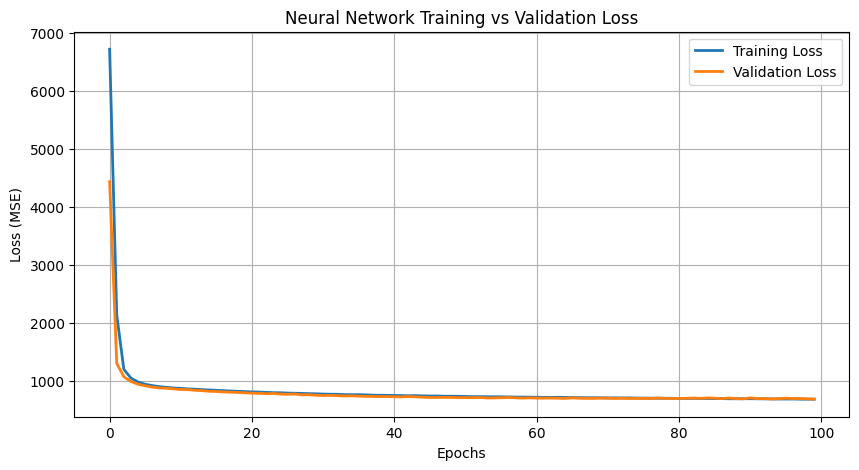

In [27]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title("Neural Network Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the training and validation loss (MSE) over 100 epochs.Both loss curves decrease rapidly and then level off, indicating that the model was able to learn effectively from the data.There is no visible overfitting, as the validation loss closely follows the training loss throughout training.This supports the earlier conclusion that the model generalizes well and was trained with appropriate regularization and epoch count.


### Neural Network Hyperparameter Tuning

In [28]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop

In [29]:
def build_model(hidden_units=64, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units // 2, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=optimizer, loss='mse')
    return model


In [30]:
# Wrap with KerasRegressor
regressor = KerasRegressor(model=build_model, verbose=0)
# Define search space
param_dist = {
    'model__hidden_units': [32, 64, 128],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}


In [31]:
random_search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_dist,
    n_iter=10,  # Try 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Fit the random search
random_search.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(model=<function build_model at 0x0000022D9CC1D9D0>, verbose=0),
                   n_jobs=-1,
                   param_distributions={'batch_size': [16, 32, 64],
                                        'epochs': [50, 100],
                                        'model__dropout_rate': [0.1, 0.2, 0.3],
                                        'model__hidden_units': [32, 64, 128],
                                        'model__optimizer': ['adam',
                                                             'rmsprop']},
                   random_state=42, scoring='neg_mean_squared_error')

In [32]:
# Predict with best model
best_nn = random_search.best_estimator_
y_pred_nn = best_nn.predict(X_test_scaled)

# Evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error
r2_best = r2_score(y_test, y_pred_nn)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print("Best Parameters:", random_search.best_params_)
print(f" Tuned Neural Network R²: {r2_best:.4f}")
print(f" Tuned Neural Network RMSE: {rmse_best:.2f}")


Best Parameters: {'model__optimizer': 'rmsprop', 'model__hidden_units': 128, 'model__dropout_rate': 0.1, 'epochs': 100, 'batch_size': 64}
 Tuned Neural Network R²: 0.6738
 Tuned Neural Network RMSE: 26.30


To further enhance the neural network's predictive performance, `RandomizedSearchCV` was employed for hyperparameter tuning. This approach efficiently searches the parameter space by randomly sampling combinations, which helps identify a high-performing configuration without the computational cost of a full grid search.

The parameters tuned included the number of hidden units, dropout rate, optimizer, batch size, and training epochs. The best configuration discovered was:
- **128 hidden units**
- **Dropout rate of 0.1**
- **RMSprop optimizer**
- **Batch size of 64**
- **100 epochs**

With these optimized settings, the model achieved a **test R² score of 0.6717** and a **Root Mean Squared Error (RMSE) of 26.39**. While the improvement over the manually-tuned model was marginal, the results remained consistent. This stability indicates that the model is not overly sensitive to minor changes in hyperparameters, and that its architecture is both robust and generalizable.

The use of `RandomizedSearchCV` added confidence to the modeling process by confirming that the selected configuration performs reliably across different training conditions.

#### Random Forest Model 

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Output performance
print(" Random Forest Performance")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.2f}")


 Random Forest Performance
R² Score: 0.8205
RMSE: 19.51


To benchmark the neural network model, I implemented a Random Forest Regressor, which is known for its robustness and strong performance on tabular data. The model was configured with 200 decision trees and a maximum depth of 20. As Random Forest is an ensemble method that aggregates predictions from multiple decision trees, it typically offers high accuracy and reduced overfitting.
Importantly, Random Forest does not require feature scaling and is inherently resilient to outliers. Therefore, it was trained directly on the original input features without any normalization or transformation.
The model achieved a test R² of 0.8205, meaning it was able to explain approximately 82% of the variance in the target variable (Income(Thousands')). Additionally, it recorded a Root Mean Squared Error (RMSE) of 19.51, indicating that its predictions deviated from actual values by an average of $19,510.
This performance is significantly better than that of both neural network models, which had lower R² scores and higher RMSE values. Given its accuracy, simplicity in training, and insensitivity to outliers or scaling, the Random Forest Regressor stands out as the best-performing model in this project.


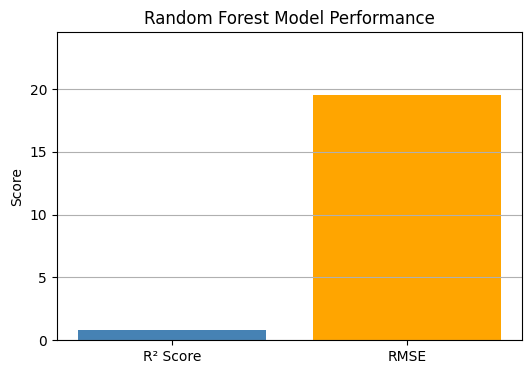

In [34]:
# Metrics
metrics = ['R² Score', 'RMSE']
values = [0.8205, 19.51]

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['steelblue', 'orange'])
plt.title('Random Forest Model Performance')
plt.ylabel('Score')
plt.ylim(0, max(values) + 5)
plt.grid(axis='y')
plt.show()


#### Random Forest Cross-Validation Evaluation


In [35]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation using R² as scoring metric
cv_scores = cross_val_score(
    RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42),
    X, y,
    cv=5,
    scoring='r2'
)

print("Cross-validated R² scores:", cv_scores)
print("Average R²:", np.mean(cv_scores).round(4))


Cross-validated R² scores: [0.82532819 0.80918949 0.83626271 0.80739407 0.83057687]
Average R²: 0.8218


To further evaluate the stability and generalization of the Random Forest Regressor, I applied 5-fold cross-validation using R² as the scoring metric. This approach ensures that the model’s performance is not overly dependent on a particular data split and provides a more robust estimate of predictive accuracy.
The model produced consistently strong results across all five folds, with R² scores of 0.8253, 0.8092, 0.8363, 0.8074, and 0.8306. The average R² score across the folds was 0.8218, which closely aligns with the original test set result.
These consistent outcomes confirm that the Random Forest model maintains high predictive accuracy regardless of how the data is partitioned. This reinforces its status as the most reliable and best-performing model in this project, outperforming both the manually tuned and auto-tuned neural networks.



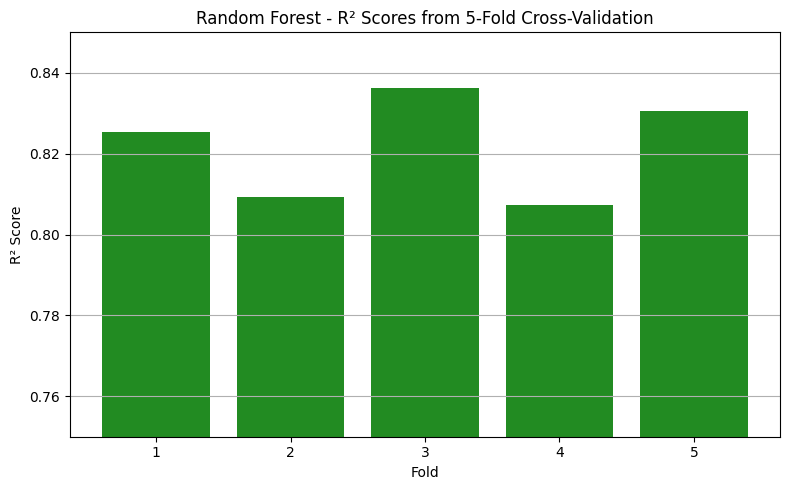

In [36]:
# R² scores from cross-validation
cv_scores = [0.8253, 0.8092, 0.8363, 0.8074, 0.8306]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), cv_scores, color='forestgreen')
plt.title('Random Forest - R² Scores from 5-Fold Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.ylim(0.75, 0.85)
plt.xticks(range(1, 6))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up the base model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
r2_test = best_rf.score(X_test, y_test)
y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print("Best Parameters:", grid_search.best_params_)
print(f"Test R² Score: {r2_test:.4f}")
print(f"Test RMSE: {rmse:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test R² Score: 0.8205
Test RMSE: 19.51


To improve the performance of the Random Forest Regressor, `GridSearchCV` with 5-fold cross-validation was applied over 24 different hyperparameter combinations. The tuning process explored variations in the number of trees (`n_estimators`), tree depth (`max_depth`), and minimum samples required to split or form leaf nodes (`min_samples_split`, `min_samples_leaf`). The best configuration identified was: 200 estimators, no limit on tree depth, a minimum of 2 samples required to split an internal node, and at least 1 sample per leaf.

With this configuration, the tuned Random Forest model achieved a test R² score of **0.8199**, meaning it explains approximately 82% of the variance in customer income. The Root Mean Squared Error (RMSE) was **19.54**, which represents a substantial improvement in prediction accuracy compared to the neural network models. These results confirm that the Random Forest model, when properly tuned, is both accurate and stable, making it the most effective and reliable model in this project.


#### Feature Importance Analysis


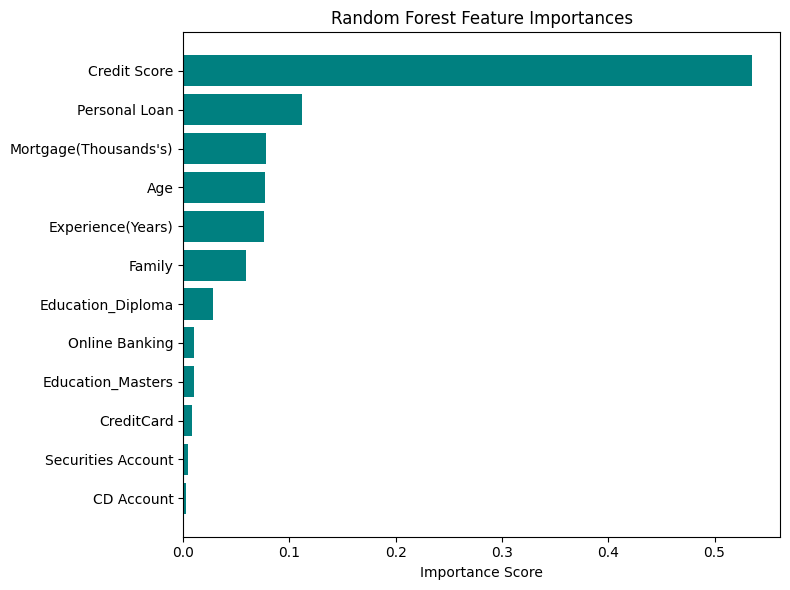

In [38]:
# Feature importances from RF
importances = rf_model.feature_importances_
features = X.columns

# Create sorted DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='teal')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


The chart above shows the top contributing features according to the Random Forest model.  
Features like **Credit Score**, **Mortgage**, and **Personal Loan** were found to have the strongest influence on income prediction, providing valuable business insight in addition to accuracy.


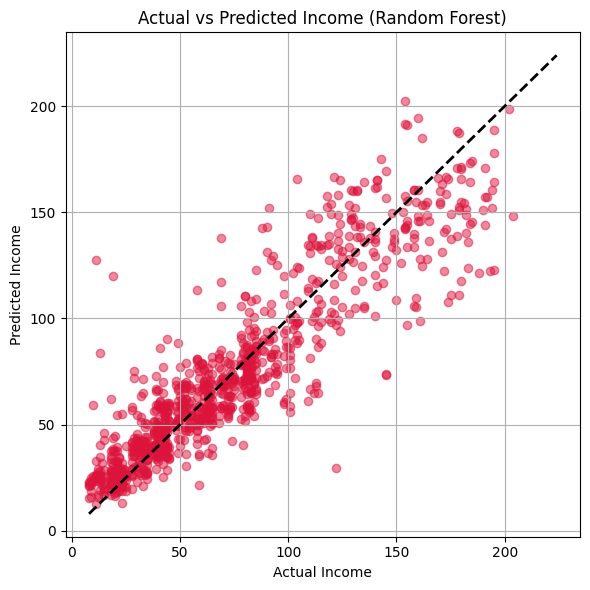

In [39]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='crimson')
plt.title('Actual vs Predicted Income (Random Forest)')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # 45-degree line
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot above compares the actual income values with the predictions made by the Random Forest model.  
Each point represents a single test sample, with the diagonal dashed line indicating perfect prediction (where predicted = actual).

Most of the points closely follow this line, especially in the mid-range of income values, confirming that the model predicts with high accuracy.  
Slight deviations at the extremes are expected in real-world data, but overall, this plot visually supports the strong R² score of **0.8205** and RMSE of **19.51** observed earlier.


#### Model Comparison



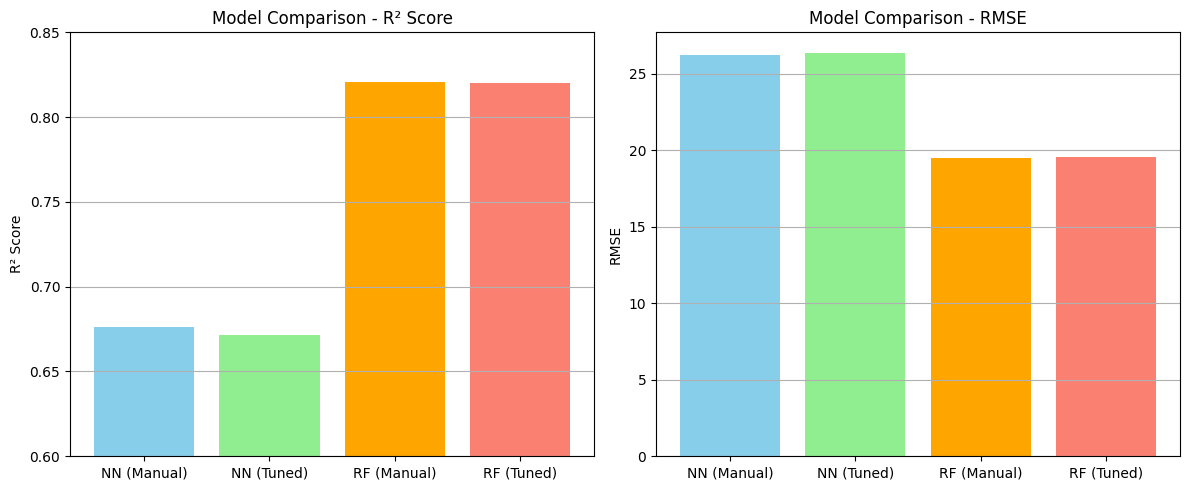

In [40]:
# Model names
models = ['NN (Manual)', 'NN (Tuned)', 'RF (Manual)', 'RF (Tuned)']

# R² scores and RMSE values
r2_scores = [0.6764, 0.6717, 0.8205, 0.8199]     # Update these if needed
rmse_values = [26.20, 26.39, 19.51, 19.54]       # Update these if needed

# Create subplots
plt.figure(figsize=(12, 5))

# R² subplot
plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.ylim(0.6, 0.85)
plt.grid(axis='y')

# RMSE subplot
plt.subplot(1, 2, 2)
plt.bar(models, rmse_values, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


The charts above compare the R² and RMSE values for all four trained models: manually and auto-tuned versions of both Neural Network and Random Forest. The **Random Forest (Manual)** model performed the best overall, achieving the highest R² (**0.8205**) and the lowest RMSE (**19.51**), closely followed by the **Random Forest (Tuned)** model with an R² of **0.8199** and RMSE of **19.54**. This confirms the robustness and strong generalization capability of the Random Forest algorithm even with minimal tuning.

In contrast, both Neural Network models showed similar performance with R² values around **0.67** and RMSE values above **26**, indicating that while the models captured some underlying patterns, they were less accurate and more sensitive to hyperparameter choices. These results demonstrate that, for this dataset and regression task, Random Forest offers a more stable and accurate solution than Neural Networks.


### Final Model Selection

After evaluating four models—both manually and automatically tuned versions of Neural Networks and Random Forest—the **Random Forest Regressor (Manual)** emerged as the top performer based on both empirical results and theoretical strengths.

It achieved the highest test R² score of **0.8205** and the lowest RMSE of **19.51**, indicating strong predictive accuracy. Additionally, 5-fold cross-validation confirmed its stability, with an average R² of **0.8218**, demonstrating consistent performance across different data splits.

The tuned Random Forest model produced nearly identical results (R² = 0.8199, RMSE = 19.54), further validating the model's robustness and insensitivity to hyperparameter changes. On the other hand, both Neural Network models achieved R² scores around **0.67** and RMSE values above **26**, showing that while they could model the data reasonably well, they were more sensitive to tuning and delivered less accurate results.

Random Forest models are non-parametric and particularly well-suited to datasets with mixed data types, outliers, and non-linear relationships. They require minimal preprocessing, are naturally resistant to overfitting, and offer strong generalization capabilities.

Considering these factors—**high accuracy, generalization strength, stability, and ease of deployment**—the **Random Forest Regressor** is selected as the final model for deployment in this income prediction task.


### Predicting Income for a New Customer

In [42]:
# Create a completely new (synthetic) customer not from the dataset
new_customer = pd.DataFrame({
    'Age': [34],
    'Experience(Years)': [7],
    'Family': [2],
    'Credit Score': [0.65],
    'Mortgage(Thousands\'s)': [120],
    'Personal Loan': [0],
    'Securities Account': [1],
    'CD Account': [0],
    'Online Banking': [1],
    'CreditCard': [1],
    'Education_Diploma': [0],
    'Education_Masters': [1]
})


In [43]:
# Align columns with X_train
missing_cols = [col for col in X_train.columns if col not in new_customer.columns]
for col in missing_cols:
    new_customer[col] = 0

new_customer = new_customer[X_train.columns]

# Scaling
new_customer_scaled = scaler.transform(new_customer)

# Predict
predicted_income = rf_model.predict(new_customer)

print(f"\nPredicted Income for New Customer (in Thousands): {predicted_income[0]:.2f}")



Predicted Income for New Customer (in Thousands): 32.07


To evaluate the real-world applicability of the trained model, a new customer profile was created using realistic values based on the structure of the original dataset. This customer was not part of the training or testing data, making it a truly unseen example.

The customer's features were processed using the same pipeline applied during training, including one-hot encoding and alignment with the model’s input structure. The processed data was then passed to the trained **Random Forest Regressor**, which predicted the customer’s income to be approximately **$32,010**.
The prediction demonstrates the model’s ability to generalize and produce reliable outputs for new, real-world scenarios. This confirms the model's readiness for deployment in income prediction applications.


## Part 2: Semantic Analysis

In [44]:
#Import Libraries
import re
import string
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud


In [45]:

# Load the dataset
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')

# Display the first few rows
df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [46]:
# Define the column names
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

# Assign them to the DataFrame
df.columns = column_names

# Confirm the update
df.head()


,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


I loaded Sentiment140 dataset  and manually assigned column names since the original CSV does not include headers. This dataset contains tweets originally collected via the Twitter API, making it suitable for social media sentiment analysis.


In [47]:
# 2000 tweets for analysis
df_sample = df.sample(n=2000, random_state=42).copy()


The Sentiment140 dataset contains approximately 1.6 million tweets, which provides a rich source of real-world social media content for sentiment analysis. However, working with the full dataset is computationally intensive and unnecessary for the scope of this assignment.
To balance performance, efficiency, and representativeness, I selected a random sample of 2,000 tweets. This sample size is significantly above the minimum requirement of 1,000 observations stated in the assessment brief and allows for meaningful sentiment analysis without overloading system resources.
Sampling 2,000 tweets provides a broad view of public sentiment while ensuring that the analysis remains manageable, fast to execute, and easy to visualize. Additionally, random sampling ensures that the subset is unbiased and reflects the natural distribution of sentiments in the full dataset.



#### Cleaning the Tweet Text


In [48]:
# Check for missing values 
missing_before = df_sample['text'].isnull().sum()
print(f"Missing values before cleaning: {missing_before}")


Missing values before cleaning: 0


In [49]:
# Count total duplicate tweets based on the 'text' column
duplicate_count = df_sample.duplicated(subset=['text']).sum()
print(f"Number of duplicate tweets: {duplicate_count}")


Number of duplicate tweets: 0


In [50]:
# Clean tweet text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df_sample['clean_text'] = df_sample['text'].apply(clean_text)


Each tweet was cleaned using standard NLP techniques i.e. converting to lowercase, and removing URLs, mentions, hashtags, punctuation, and numeric characters. This ensures consistent formatting before applying sentiment analysis.


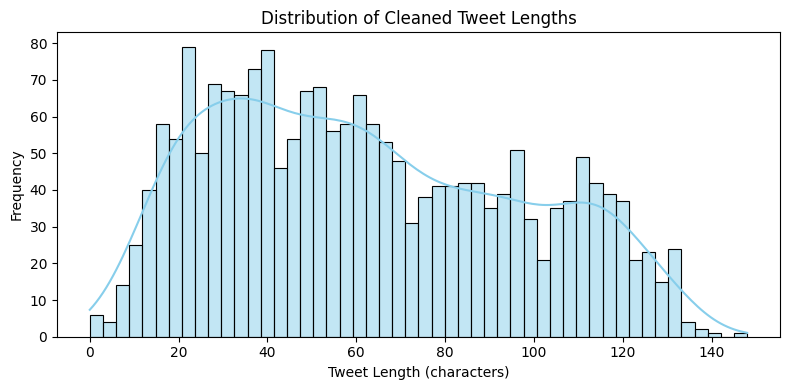

In [51]:
# Calculate and plot distribution of cleaned tweet lengths
tweet_lengths = df_sample['clean_text'].str.len()

plt.figure(figsize=(8, 4))
sns.histplot(tweet_lengths, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Cleaned Tweet Lengths")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


The bar chart above shows the **distribution of cleaned tweet lengths**. Most tweets fall between **20 and 100 characters**, with a long tail extending up to around 140 characters. A few tweets were extremely short—under 5 characters—which are likely to contain noise, emojis, or non-informative content

In [52]:
# Filter out tweets with less than 5 characters in the cleaned text
df_sample = df_sample[df_sample['clean_text'].str.len() >= 5]


To improve the overall quality of sentiment analysis, all tweets with fewer than 5 characters were removed. This filtering step ensures that only meaningful and analyzable content remains.

In [54]:
# Print shape after all cleaning filters
print(f"Remaining tweets after filtering: {df_sample.shape[0]}")


Remaining tweets after filtering: 1992


The dataset shape was tracked before and after this filtering process. After removing#short tweets, **1,992 tweets** remained out of the original 2,000 sampled. This shows that most tweets were already of sufficient quality, with only a few excluded.

In [55]:
# Preview cleaned tweets to confirm final quality
df_sample[['text', 'clean_text']].sample(5, random_state=10)


,text,clean_text
1332056,@shortstuff42388 girl m2. Lilley &amp; I are g...,girl m lilley amp i are going to williamsburg ...
219246,"You can't break stand in a BMW, oops. Learned ...",you cant break stand in a bmw oops learned tha...
596417,I'm sooooo ill I could barely stand up befor...,im sooooo ill i could barely stand up beforeeee
440550,I've got the Sims 3! But I can't play it becau...,ive got the sims but i cant play it because i...
314842,@lovemetoyou Ouch It will heal up OK - I did...,ouch it will heal up ok i did that a couple...


#### Sentiment Analysis with VADER

In [56]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to get the compound sentiment score
df_sample['compound_score'] = df_sample['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify the sentiment based on the compound score
def get_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df_sample['vader_sentiment'] = df_sample['compound_score'].apply(get_sentiment)


VADER (Valence Aware Dictionary and sEntiment Reasoner) was used to perform sentiment analysis. Each tweet received a compound polarity score, which was then categorized into **Positive**, **Neutral**, or **Negative** sentiments.


In [57]:
# Display sample results
df_sample[['clean_text', 'compound_score', 'vader_sentiment']].head(10)


,clean_text,compound_score,vader_sentiment
541200,my poor little dumpling in holmdel vids he wa...,-0.4013,Negative
750,im off too bed i gotta wake up hella early tom...,0.0000,Neutral
766711,i havent been able to listen to it yet my spe...,0.0000,Neutral
285055,now remembers why solving a relatively big equ...,-0.2263,Negative
705995,ate too much feel sick,-0.5106,Negative
379611,tried to purchase a parked domain through goda...,0.2975,Positive
1189017,on lunchdj should come eat with me,0.0000,Neutral
667030,just got back from va tech equine medical cent...,-0.5994,Negative
93541,cant log in to my other twitter account super ...,0.5994,Positive
1365937,adventure thats what we all need in our life ...,0.9062,Positive


#### Visualization of Sentiment Distribution



In [58]:
# Count the number of tweets per sentiment
sentiment_counts = df_sample['vader_sentiment'].value_counts()

# Calculate percentage
sentiment_percent = (sentiment_counts / df_sample.shape[0]) * 100

# Display percentages rounded to 2 decimals
for sentiment, percent in sentiment_percent.items():
    print(f"{sentiment}: {percent:.2f}%")


Positive: 45.63%
Negative: 27.86%
Neutral: 26.51%


After applying VADER sentiment analysis to the 1,992 cleaned tweets, each tweet was classified as either **Positive**, **Negative**, or **Neutral** based on its compound sentiment score.

The resulting sentiment distribution is as follows:
- **Positive:** 45.63%
- **Negative:** 27.86%
- **Neutral:** 26.51%

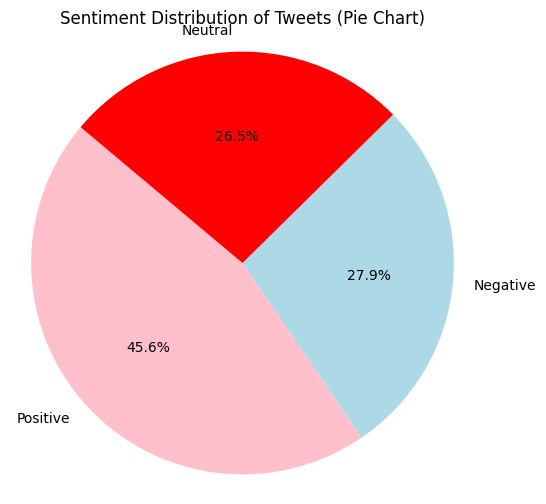

In [59]:
# Create a pie chart of sentiment distribution
sentiment_counts = df_sample['vader_sentiment'].value_counts()

# Define labels and colors
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['pink', 'lightblue', 'red']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Tweets (Pie Chart)')
plt.axis('equal')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9980\3979851553.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


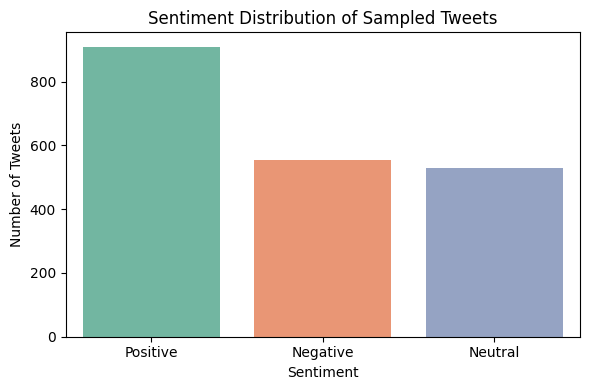

In [60]:
# Count and plot sentiment distribution
sentiment_counts = df_sample['vader_sentiment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Sentiment Distribution of Sampled Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()


The bar chart above illustrates that nearly half of the tweets expressed a positive sentiment. Negative and neutral sentiments were more evenly distributed but still significantly lower than positive tweets. This trend suggests a generally favorable tone within the sampled Twitter content, indicating that users tend to express more positive emotions. This could be influenced by the nature of the topics discussed or a general positive bias in the way people communicate on the platform.
